# Stage 3 - HackBio Internship: Neuroscience and Psychology

## Team Members:
- *Chama BENSLIMANE (Leader)*: [GitHub Profile](https://github.com/BenslimaneChama)
- *Mohammad HICHAM POLO*: [GitHub Profile](https://github.com/MohammadHichamPolo)

## Project Overview

This notebook presents an analysis of a given dataset using biostatistical and machine learning techniques to classify and detect signs of depression in university students. The approach includes:

- Data preprocessing and exploration
- Application of machine learning models for classification
- Biostatistical analysis of relevant factors
- Interpretation of results through markdown explanations and visualizations

All findings, including statistical interpretations and graph analyses, are documented within this notebook to provide a comprehensive understanding of the methodology and outcomes.

# PACKAGES NEEDED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# DATA IMPORTING

In [2]:
df = pd.read_csv('http://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/Student%20Depression%20Dataset.csv')
df

id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
27896          5-6 hours      Unhealthy  Class 12   
27897  Less than 5 hours        Healthy       MSc   
27898          5-6 hours      Unhealthy        MD   
27899  Less than 5 hours        Healthy  Class 12   
27900  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27896               1.0                              Yes           0  
27897               3.0                              Yes           0  
27898               2.0                               No           0  
27899               5.0                               No           1  
27900               3.0                              Yes           1  

[27901 row

Once data has been imported, we run df to see what our dataframe would look like, and as we can see, we have quite a lot of qualitative (or str) data, which we should sort and digitize.

# DATA TREATMENT

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

To find out in more detail all possible information about my data, and as we can see it gives us not only the column names, but also its type (object, float, int) but also how many rows there are, memory usage ect...

In [4]:
df=df.dropna()
df = df.drop(columns=['id'])

In [5]:
count_zero_job_satisfaction = (df['Job Satisfaction'] != 0.0).sum()
print(f"Number of students with Job Satisfaction = 0.0: {count_zero_job_satisfaction}")

Number of students with Job Satisfaction = 0.0: 8


As we'll be concentrating only on students, as requested in the task for this course3, we first want to know how many people among my data have a profession, so I'd like to know how many people's job satifaction is different from 0, which is a very good indicator of whether a person is working or not, here the number is very weak... 8/27901.

In [6]:
count_zero_work_pressure = (df['Work Pressure'] != 0.0).sum()
print(f"Number of students with Work Pressure = 0.0: {count_zero_work_pressure}")

Number of students with Work Pressure = 0.0: 3


In the same way, we will calculate how many people have a work pressure, different from 0, which is also a very small number 3/27901

In [7]:
non_students_count = (df['Profession'] != 'Student').sum()
print(f"Number of people who are NOT students: {non_students_count}")

Number of people who are NOT students: 31


To be sure we've only got students, we'll need to list how many people have professions or are students, which according to our output is 31 people, a very small number compared to my data set.

So we'll have to eliminate all data with a profession, since it's likely to distort our results, and what's more they're very few in number, which shows that it's not really important. Then we'll eliminate these columns, since all our dataset now consists of students with values of 0.0 for job satisfaction and work pressure.

In [8]:
# Keep only rows where Work Satisfaction and Job Satisfaction are 0
df = df[(df['Job Satisfaction'] == 0.0) & (df['Work Pressure'] == 0.0)]
df = df[df['Profession'] == 'Student']

In [9]:
df = df.drop(columns=['Profession'])
df = df.drop(columns=['Job Satisfaction'])
df = df.drop(columns=['Work Pressure'])

In [10]:
print(df['City'].unique())

['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']


Now that we've filtered out non-student data, our focus shifts to the city columns. Since this is qualitative (text-based) data, where respondents manually enter their answers, there's a risk of duplicates or inconsistencies. To address this, we need to:
-Identify unique city names to ensure standardization.
-Review the full set of responses to detect any anomalies, such as typos, variations, or unexpected entries

And that's exactly what we've done here, after which we've found that there are false values such as “Me” or “M.Com” or even numerical values that are far from being city names. So we created a list with all valid city names, and deleted any values against this list.


In [11]:
valid_cities = [
    'Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur', 'Pune', 'Thane',
    'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Kalyan', 'Rajkot', 'Ahmedabad',
    'Kolkata', 'Mumbai', 'Lucknow', 'Indore', 'Surat', 'Ludhiana', 'Bhopal',
    'Meerut', 'Agra', 'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
    'Faridabad', 'Delhi'
]


df = df[df['City'].isin(valid_cities)]

In [12]:
le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])

# Save the mapping of City names to numbers
city_mapping = dict(zip(le_city.classes_, le_city.transform(le_city.classes_)))

print(city_mapping)

{'Agra': 0, 'Ahmedabad': 1, 'Bangalore': 2, 'Bhopal': 3, 'Chennai': 4, 'Delhi': 5, 'Faridabad': 6, 'Ghaziabad': 7, 'Hyderabad': 8, 'Indore': 9, 'Jaipur': 10, 'Kalyan': 11, 'Kanpur': 12, 'Kolkata': 13, 'Lucknow': 14, 'Ludhiana': 15, 'Meerut': 16, 'Mumbai': 17, 'Nagpur': 18, 'Nashik': 19, 'Patna': 20, 'Pune': 21, 'Rajkot': 22, 'Srinagar': 23, 'Surat': 24, 'Thane': 25, 'Vadodara': 26, 'Varanasi': 27, 'Vasai-Virar': 28, 'Visakhapatnam': 29}


Now that we're sure we've only got cities, we'll have to digitize them to make it easier for the machine to learn, but without really forgetting their names, in order that if ever depression depended on cities, we could easily know which one had the most effect. So we created a dictionary containing not only the new city label, but also its name.

In [13]:
print(df['Sleep Duration'].unique()) 

['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']


We're now interested in knowing, as we did for the cities, the contents of the sleep duration column, to find out how to maintain it. The output shows that it contains 5 text sections, which we'll need to digitize.

In [14]:
categorical_cols = ['Gender', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Create a dictionary to store mappings
label_encoders = {}

# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    # Store the mapping of labels to numbers
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print all mappings
for col, mapping in label_encoders.items():
    print(f"Mapping for {col}: {mapping}")


sleep_mapping = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    'Others': 6.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Dietary Habits: {'Healthy': 0, 'Moderate': 1, 'Others': 2, 'Unhealthy': 3}
Mapping for Degree: {'B.Arch': 0, 'B.Com': 1, 'B.Ed': 2, 'B.Pharm': 3, 'B.Tech': 4, 'BA': 5, 'BBA': 6, 'BCA': 7, 'BE': 8, 'BHM': 9, 'BSc': 10, 'Class 12': 11, 'LLB': 12, 'LLM': 13, 'M.Com': 14, 'M.Ed': 15, 'M.Pharm': 16, 'M.Tech': 17, 'MA': 18, 'MBA': 19, 'MBBS': 20, 'MCA': 21, 'MD': 22, 'ME': 23, 'MHM': 24, 'MSc': 25, 'Others': 26, 'PhD': 27}
Mapping for Have you ever had suicidal thoughts ?: {'No': 0, 'Yes': 1}
Mapping for Family History of Mental Illness: {'No': 0, 'Yes': 1}


As part of the data digitization process, we've automatically standardized the labels for all qualitative values to prevent inconsistencies. To ensure traceability, we've also created a dictionary to store and verify these labels later.

However, sleep duration is an exception since it contains more specific and varied data that can't be easily standardized through automation. Therefore, we'll need to manually adjust these values before converting them into the final table.

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27833 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27833 non-null  int32  
 1   Age                                    27833 non-null  float64
 2   City                                   27833 non-null  int32  
 3   Academic Pressure                      27833 non-null  float64
 4   CGPA                                   27833 non-null  float64
 5   Study Satisfaction                     27833 non-null  float64
 6   Sleep Duration                         27833 non-null  float64
 7   Dietary Habits                         27833 non-null  int32  
 8   Degree                                 27833 non-null  int32  
 9   Have you ever had suicidal thoughts ?  27833 non-null  int32  
 10  Work/Study Hours                       27833 non-null  float64
 11  Financi

So we check our whole database, whether all the values are now numerical, whether there are any empty columns, how many rows we have, etc.... So we can work directly from this point.

# POTENTIAL PREDICTIVE FEATURES INVISTIGATION USING PCA AND RFE ALONGSIDE A BENCHMARK OF MODEL TRAINING

### WHOLE FEATURES GENERAL POPULATION PCA PLOT AND BY GENDER 

##### FUNCTION TO PLOT PCA BY GENDER

In [16]:
def plot_pca_by_gender(df, gender, ax):
    df_gender = df[df["Gender"] == gender]
    
    # Standardize the data for this gender group
    scaled_data_gender = scaler.fit_transform(df_gender[numeric_columns])
    
    # Apply PCA
    pca_gender = PCA(n_components=2)
    pca_components_gender = pca_gender.fit_transform(scaled_data_gender)
    
    # Compute feature contributions
    loadings_gender = pd.DataFrame(pca_gender.components_.T, columns=["PC1", "PC2"], index=numeric_columns)
    top_vars_pc1_gender = loadings_gender["PC1"].abs().nlargest(3).index.tolist()
    top_vars_pc2_gender = loadings_gender["PC2"].abs().nlargest(3).index.tolist()
    
    # Create DataFrame for visualization
    pca_df_gender = pd.DataFrame(pca_components_gender, columns=["PCA1", "PCA2"])
    pca_df_gender["Depression"] = df_gender["Depression"].values
    
    # Plot PCA results
    sns.scatterplot(data=pca_df_gender, x="PCA1", y="PCA2", hue="Depression", palette="coolwarm", alpha=0.7, ax=ax)
    ax.set_xlabel(f"PCA1 ({', '.join(top_vars_pc1_gender)})")
    ax.set_ylabel(f"PCA2 ({', '.join(top_vars_pc2_gender)})")
    ax.set_title(f"PCA - Gender {gender}")
    ax.legend(title="Depression")

##### PCA PLOTS

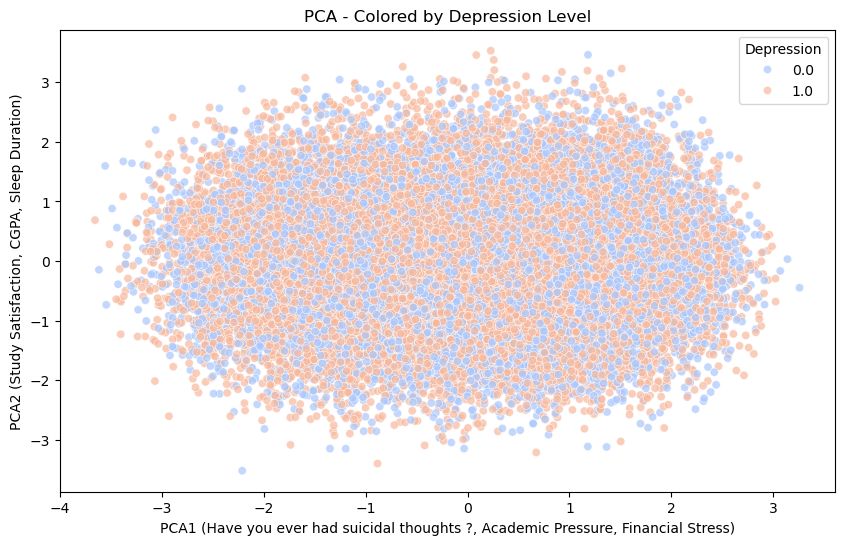

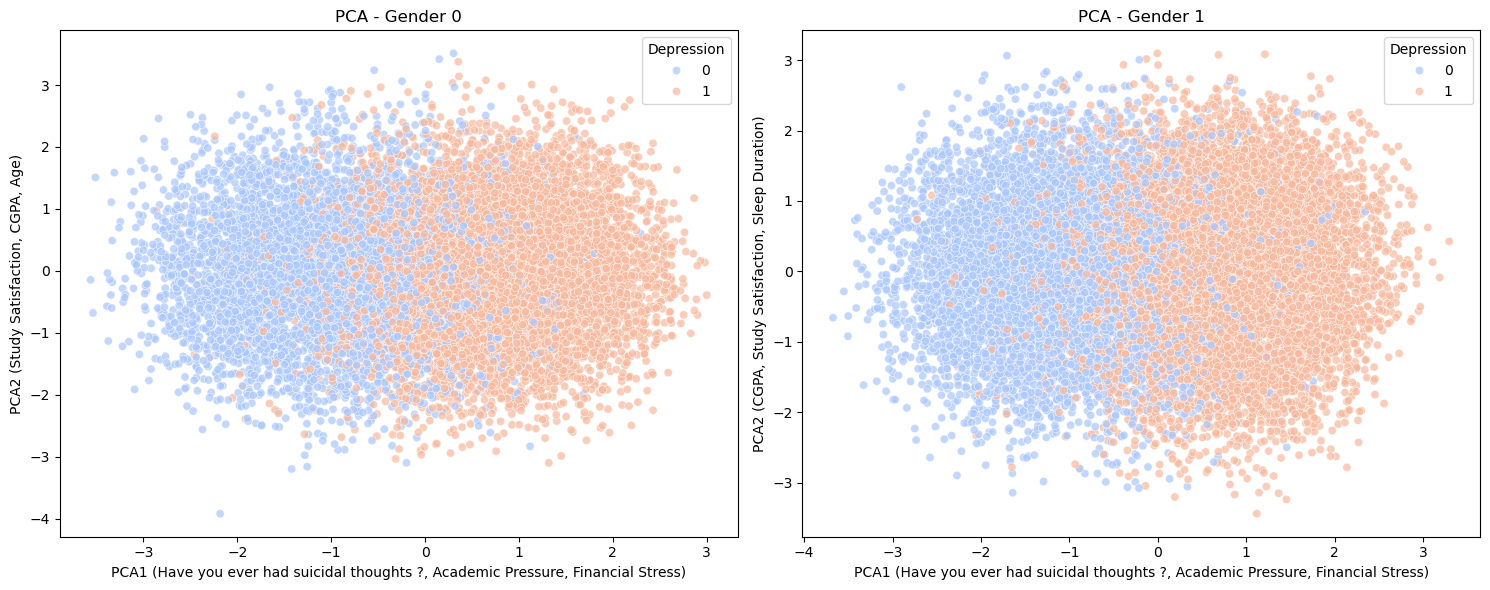

In [17]:
exclude_columns = ["Depression", "City", "Degree", "Gender"]  # Exclude categorical columns
numeric_columns = [col for col in df.columns if col not in exclude_columns and pd.api.types.is_numeric_dtype(df[col])]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=numeric_columns)
top_vars_pc1 = loadings["PC1"].abs().nlargest(3).index.tolist()  # Top 3 features for PC1
top_vars_pc2 = loadings["PC2"].abs().nlargest(3).index.tolist()  # Top 3 features for PC2

pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df["Depression"] = df["Depression"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Depression", palette="coolwarm", alpha=0.7)
plt.xlabel(f"PCA1 ({', '.join(top_vars_pc1)})")
plt.ylabel(f"PCA2 ({', '.join(top_vars_pc2)})")
plt.title("PCA - Colored by Depression Level")
plt.legend(title="Depression")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Male (Gender 0)
plot_pca_by_gender(df, gender=0, ax=axes[0])
# Plot for Female (Gender 1)
plot_pca_by_gender(df, gender=1, ax=axes[1])

plt.tight_layout()
plt.show()

In order to understand the key factors influencing depression and improve our model’s ability to detect it, we trained our machine learning model using all available data. We began by applying PCA without RFE, allowing us to analyze the contribution of each feature. 

PCA's job is to reduce the number of features by creating new "principal components" that capture the most variance (information) in the data. And in order to visualise thoe data in 2D, we chosed 2 Principal components 1 and 2.

Through this, we observed that PC1 selected three dominant features that had the most influence (Financial stress, Suicidal thoughts & Academic pressure), while PC2 highlighted three other important variables that describe different aspects of the data (CGPA, study satisfaction & Sleep Duration). This helped us identify the most significant factors contributing to depression and guided our feature selection process.

In the graph, where the two genders are mixed, we could see that the blue dots (students not diagnosed with depression) and the orange dots (students diagnosed with depression) are almost indistinguishable, overlapping and not differentiated. 
However, since we separated the two genders, we could see that each of the blue and orange dots began to differentiate, each on its own side, with no real dividing line. Which shows that PC1 and PC2 were very successful in identifying the 6 most important features, but also that we couldn't really distinguish between them, because depression is far too complex, and perhaps linked to several factors at once.

This helped us conclude that only 6 variables could be enough to distinguish between depressed and healthy students guiding our feature selection process.


### DATA PREPARATION FOR MACHINE LEARNING

In [18]:
X = df.drop(columns=['Depression']) 
Y = df["Depression"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

### METRIC REPORT AND CONFUSION MATRIX OF ALL FEAUTURES  LOGISTIC REGRESSION 

Logistic Regression Accuracy: 0.8434

Confusion Matrix:
 [[1806  514]
 [ 358 2889]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      2320
           1       0.85      0.89      0.87      3247

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.84      5567
weighted avg       0.84      0.84      0.84      5567



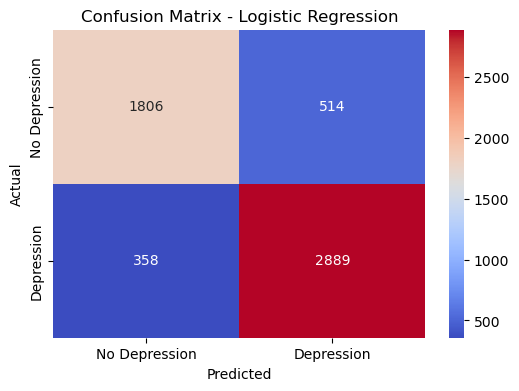

In [20]:
log_reg = LogisticRegression(max_iter=1000,random_state=123) 
log_reg.fit(X_train, Y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

We decided to start with Logistic Regression, as it is a simple yet effective model for making binary Yes or No decisions.

For our first attempt, we chose not to apply Recursive Feature Elimination (RFE) yet. This allowed us to evaluate the model’s raw performance using Principal Component Analysis (PCA) without reducing the feature set. By calculating the Confusion Matrix, we could assess the model’s accuracy determining how many predictions were correct, how many were incorrect, and overall how well the first PCA transformation captured the key patterns in the data.

The result was an accuracy of 0.8434, which means that the Logistic Regression performed strongly, with 84% accuracy, which means that we were able to select features that contribute very well to predicting depression.

And for Confusion Matrix, we had True Negative results of 1806, and True Positive of 2889, values almost triple the false predictions.

### RFE 6 FEATURES SELECTION AND MODEL TRAINING

In [21]:
log_reg = LogisticRegression(max_iter=1000,random_state=123)

rfe = RFE(estimator=log_reg, n_features_to_select=6)
X_rfe = rfe.fit_transform(X, Y)  

selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, Y, test_size=0.2, random_state=42)

log_reg.fit(X_train_rfe, y_train)

y_pred_rfe = log_reg.predict(X_test_rfe)

print("Logistic Regression with RFE (6 features) trained successfully!")

Selected Features: Index(['Academic Pressure', 'Study Satisfaction', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')
Logistic Regression with RFE (6 features) trained successfully!


To make sure that PCA selected the right features the first time, we tried to use RFE, selecting 6 columns that are really the most important. The selected features are : 
-Academic Pressure
-Study Satisfaction
-Dietary Habits
-Suicidal Thoughts
-Financial Stress
-Family History of Mental Illness

Which is different from what we got the first time with PCA all features combined.

### PCA PLOT USING THE 6 SELECTED FEATURES 

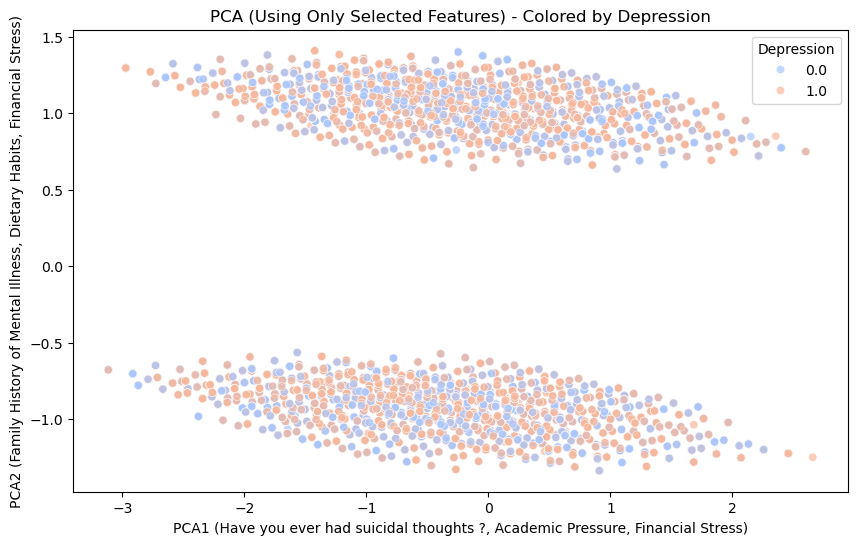

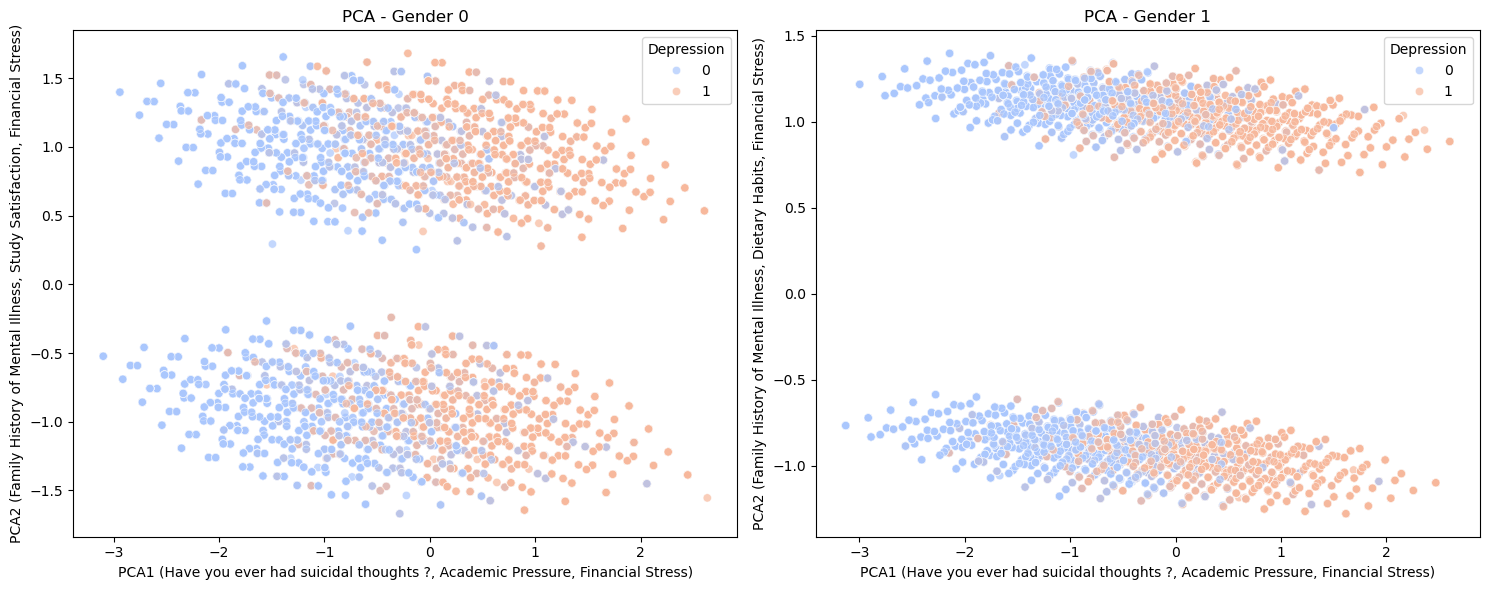

In [22]:
# Select initial features and create a COPY for visualization purposes
X_selected = df[selected_features]
X_selected_PCA = X_selected.copy()  # Create independent copy
X_selected_PCA["Gender"] = df["Gender"]
X_selected_PCA["Depression"] = df["Depression"]

# Scaling and PCA should use ONLY the selected features (without Gender/Depression)
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)  # Original features only

# Apply PCA to original selected features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled_selected)

# Create loadings from ORIGINAL features (matches PCA components)
loadings = pd.DataFrame(pca.components_.T, 
                       columns=["PC1", "PC2"], 
                       index=selected_features)  # Now matches shape

# Get top features for axis labels
top_vars_pc1 = loadings["PC1"].abs().nlargest(3).index.tolist()
top_vars_pc2 = loadings["PC2"].abs().nlargest(3).index.tolist()

# Create PCA df with depression labels
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df["Depression"] = Y  # Add depression labels

# Plot main PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Depression", 
                palette="coolwarm", alpha=0.7)
plt.xlabel(f"PCA1 ({', '.join(top_vars_pc1)})")
plt.ylabel(f"PCA2 ({', '.join(top_vars_pc2)})")
plt.title("PCA (Using Only Selected Features) - Colored by Depression")
plt.legend(title="Depression")
plt.show()

# Define numeric columns for gender plots (ONLY original features)
numeric_columns = selected_features  # Important: don't include Gender/Depression

# Gender comparison plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_pca_by_gender(X_selected_PCA, gender=0, ax=axes[0])
plot_pca_by_gender(X_selected_PCA, gender=1, ax=axes[1])
plt.tight_layout()
plt.show()

The first thing we notice in this graph is that it is slightly different from the first (All Features), that the orange (depressive) and blue (non-depressive) points overlap more than the first, yet each dominates one side the most, so there is indeed a difference between the two, slight but existent, and the fact that there are still no lines separating the two, confirms that the relationship between all these variables and depression, is much more complex.

### METRIC REPORT AND CONFUSION MATRIX OF RFE's 6 SELECTED FEATURES LOGISTIC REGRESSION 

Logistic Regression with RFE (6 features) - Accuracy: 0.8392

Confusion Matrix:
 [[1791  529]
 [ 366 2881]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2320
           1       0.84      0.89      0.87      3247

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.83      5567
weighted avg       0.84      0.84      0.84      5567



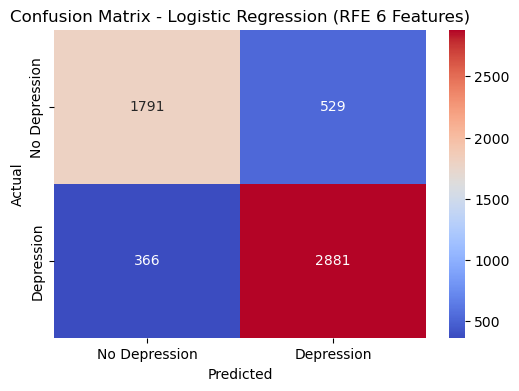

In [23]:
accuracy = accuracy_score(y_test, y_pred_rfe)
conf_matrix = confusion_matrix(y_test, y_pred_rfe)
class_report = classification_report(y_test, y_pred_rfe)

print(f"Logistic Regression with RFE (6 features) - Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (RFE 6 Features)")
plt.show()

For a reliable mathematical proof, we used Confusing matrix, which this time gave us an accuracy of 0.8392, i.e. 83% or even 84%. Admittedly the value has decreased slightly, but it's still just as strong. True Negatives and True Positives have only decreased by approximately 8 points. This proves that the other features were not really important or indispensable.

### RFE 1 FEATURE SELECTION AND MODEL TRAINING

In [24]:
log_reg = LogisticRegression(max_iter=1000,random_state=123)
rfe = RFE(estimator=log_reg, n_features_to_select=1)
X_rfe = rfe.fit_transform(X, Y)

selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, Y, test_size=0.2, random_state=42)

log_reg.fit(X_train_rfe, y_train)

y_pred_rfe = log_reg.predict(X_test_rfe)

print("Logistic Regression with RFE (1 features) trained successfully!")

Selected Features: Index(['Have you ever had suicidal thoughts ?'], dtype='object')
Logistic Regression with RFE (1 features) trained successfully!


To be sure of the best variable, which best predicts depression, we again used RFE, but this time only one feature. 
The one chosen was fu: Suicidal thoughts, so again, as we saw previously, we gave the machine time to practice, and try to predict based on just one variable.

### METRIC REPORT AND CONFUSION MATRIX OF RFE's 1 SELECTED FEATURE LOGISTIC REGRESSION 

Logistic Regression with RFE (1 feature) - Accuracy: 0.7868

Confusion Matrix:
 [[1579  741]
 [ 446 2801]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      2320
           1       0.79      0.86      0.83      3247

    accuracy                           0.79      5567
   macro avg       0.79      0.77      0.78      5567
weighted avg       0.79      0.79      0.78      5567



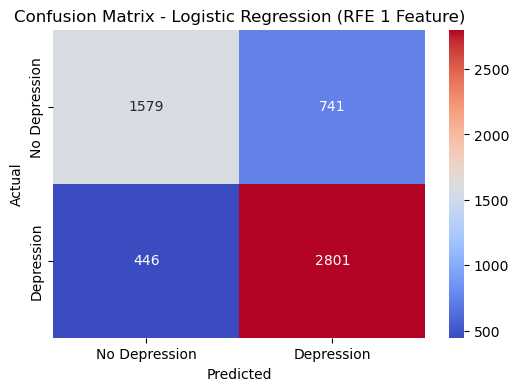

In [25]:
accuracy = accuracy_score(y_test, y_pred_rfe)
conf_matrix = confusion_matrix(y_test, y_pred_rfe)
class_report = classification_report(y_test, y_pred_rfe)

print(f"Logistic Regression with RFE (1 feature) - Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (RFE 1 Feature)")
plt.show()

We then calculated the accuracy and confusion matrix again, which shows that this feature is 78% to 79% capable of predicting the probability of depression on its own, a value too far from half, showing just how important it is. What's more, the right prediction rate exceeds the wrong ones rate by a factor of 3!

# RANDOMFOREST

### METRIC REPORT AND CONFUSION MATRIX OF ALL FEAUTURES  RANDOMFOREST

Random Forest (Without RFE) - Accuracy: 0.8425

Confusion Matrix:
 [[1805  515]
 [ 362 2885]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      2320
           1       0.85      0.89      0.87      3247

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.84      5567
weighted avg       0.84      0.84      0.84      5567



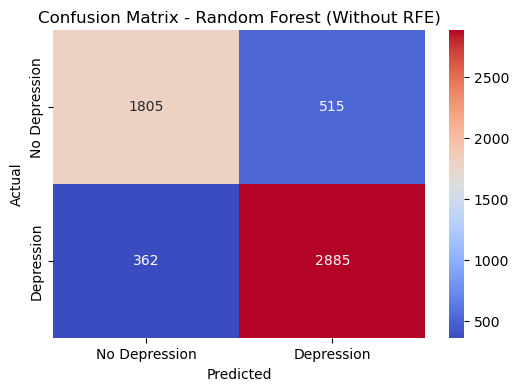

In [26]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=123)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_rf)
conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
class_report = classification_report(Y_test, Y_pred_rf)

print(f"Random Forest (Without RFE) - Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Without RFE)")
plt.show()

Here, we used the Random Forest, because it is an ensemble learning method that improves prediction accuracy by combining multiple decision trees. Unlike logistic regression, Random Forest can capture complex, nonlinear relationships between features and depression. It also provides feature importance scores, helping us understand which variables contribute the most to predictions. However, it is less interpretable than logistic regression.

And as we did for Logistic regression, we decided to calculate the confusion matrix, in order to know the accuracy, the amount of good predictions, and the wrong ones also. 

What the results show us is that random forest is very slightly less than logistic regression on the order of 0.001 (Logistic Regression = 0.8434; Random Forest : 0.8425), with the number of good and bad predictions slightly less than logistic regression. Yet both showed roughly the same accuracy percentage (84%), which shows that the features selected by PCA without having to use RFE show a very high prediction of the detection of depression.

### RFE 6 FEATURES SELECTION AND MODEL TRAINING

In [27]:
rf_model = RandomForestClassifier(n_estimators=1000,random_state=123)
rfe = RFE(estimator=rf_model, n_features_to_select=6)
X_rfe = rfe.fit_transform(X, Y)

selected_features_rf = X.columns[rfe.support_]
print(f"Selected Features (Random Forest + RFE): {selected_features_rf}")

X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, Y, test_size=0.2, random_state=42)

rf_model.fit(X_train_rfe, y_train)

y_pred_rf_rfe = rf_model.predict(X_test_rfe)

print("RandomForest with RFE (6 features) trained successfully!")

Selected Features (Random Forest + RFE): Index(['Age', 'City', 'Academic Pressure', 'CGPA',
       'Have you ever had suicidal thoughts ?', 'Financial Stress'],
      dtype='object')
RandomForest with RFE (6 features) trained successfully!


Unlike Logistic Regression, we noticed that Random Forest selected features different from those chosen by the first model. This means Random Forest benefits from more features than Logistic Regression. 
As before, we trained the machine with these features alone, to see how accurate they are at predicting the presence of depression.

### PCA PLOT USING THE 6 SELECTED FEATURES 

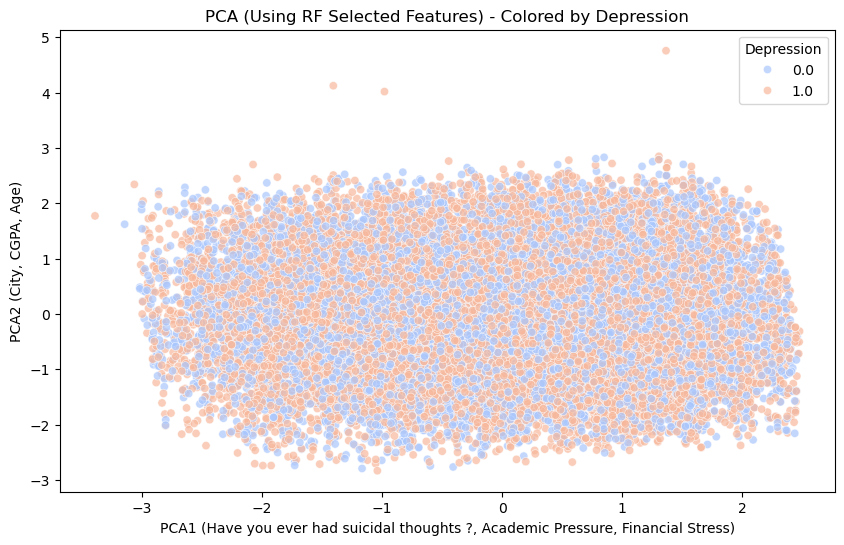

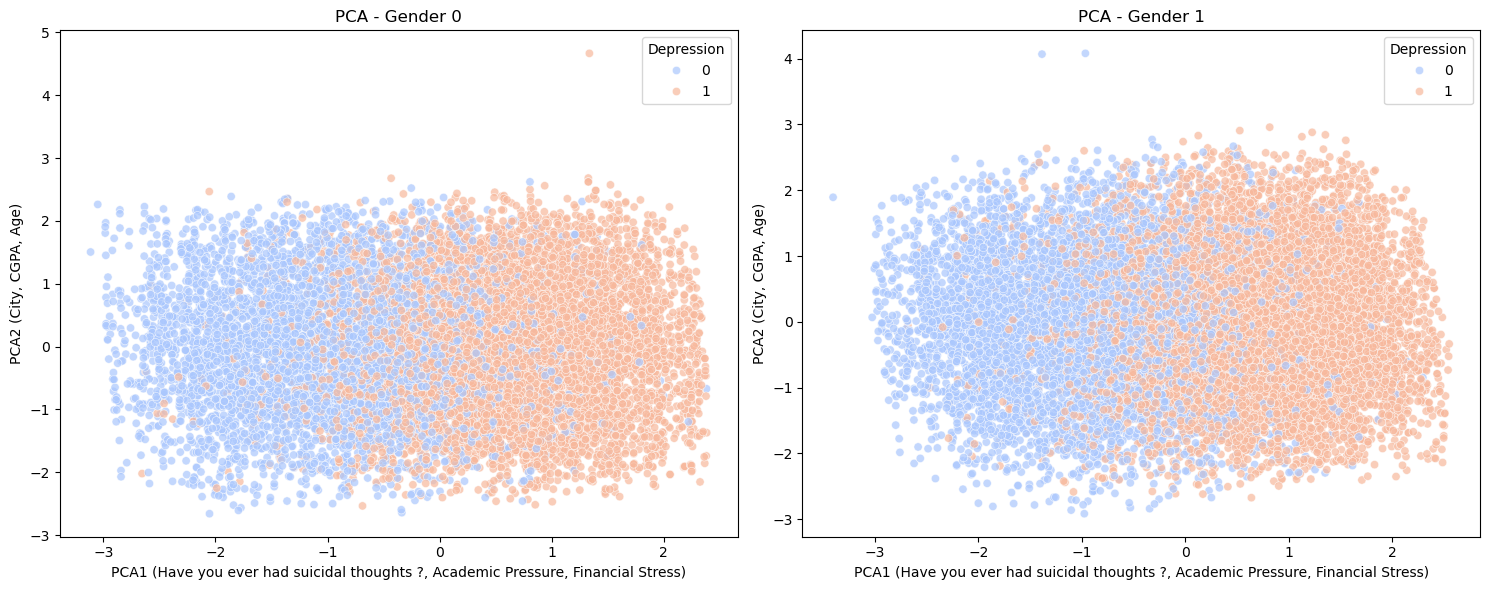

In [28]:
# Select features and create visualization copy with Gender/Depression
X_selected_rf = df[selected_features_rf]
X_selected_rf_PCA = X_selected_rf.copy()  # Create independent copy
X_selected_rf_PCA["Gender"] = df["Gender"]
X_selected_rf_PCA["Depression"] = df["Depression"]

# Scaling and PCA using ONLY selected features
scaler = StandardScaler()
X_scaled_rf = scaler.fit_transform(X_selected_rf)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled_rf)

# Create loadings from original selected features
loadings = pd.DataFrame(pca.components_.T, 
                       columns=["PC1", "PC2"], 
                       index=selected_features_rf)

# Get top features for labels
top_vars_pc1 = loadings["PC1"].abs().nlargest(3).index.tolist()
top_vars_pc2 = loadings["PC2"].abs().nlargest(3).index.tolist()

# Create PCA df with depression labels
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df["Depression"] = Y  # Assuming Y is your target variable

# Plot main PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Depression", 
               palette="coolwarm", alpha=0.7)
plt.xlabel(f"PCA1 ({', '.join(top_vars_pc1)})")
plt.ylabel(f"PCA2 ({', '.join(top_vars_pc2)})")
plt.title("PCA (Using RF Selected Features) - Colored by Depression")
plt.legend(title="Depression")
plt.show()

# Define numeric columns for gender plots
numeric_columns = selected_features_rf  # CRUCIAL: Use RF-selected features

# Gender comparison plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_pca_by_gender(X_selected_rf_PCA, gender=0, ax=axes[0])  # Pass modified dataframe
plot_pca_by_gender(X_selected_rf_PCA, gender=1, ax=axes[1])
plt.tight_layout()
plt.show()

The graph illustrates the dispersion of students diagnosed with depression (orange) and those not diagnosed (blue). Initially, when both genders are included, the plot does not provide a clear distinction. However, once we separate the data by gender, a clearer pattern starts to emerge.

Notably, in some regions of the plot, orange points (depressed students) begin to cluster, while blue points (non-depressed students) dominate another region. This suggests that certain features contribute to a visible separation between the two groups.

However, despite this emerging distinction, there is still no clear boundary (decision line) that fully separates depressed from non-depressed students. This means we cannot yet pinpoint the exact features responsible for detecting depression with certainty.

Moreover, when we compare different models, we observe that the PCA plot using Logistic Regression with RFE-selected features offers a much clearer visual distinction compared to the PCA plot of the RFE-selected features in Random Forest. This suggests that the feature selection process in Logistic Regression better captures the separation between the two groups than the one used in Random Forest.

### METRIC REPORT AND CONFUSION MATRIX OF RFE's 6 SELECTED FEATURES LOGISTIC REGRESSION 

Random Forest with RFE (6 features) - Accuracy: 0.8191

Confusion Matrix:
 [[1757  563]
 [ 444 2803]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      2320
           1       0.83      0.86      0.85      3247

    accuracy                           0.82      5567
   macro avg       0.82      0.81      0.81      5567
weighted avg       0.82      0.82      0.82      5567



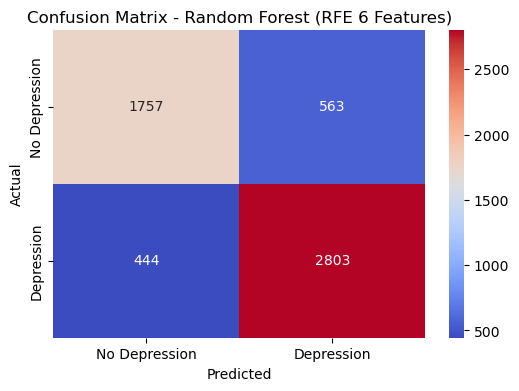

In [29]:
accuracy = accuracy_score(y_test, y_pred_rf_rfe)
conf_matrix = confusion_matrix(y_test, y_pred_rf_rfe)
class_report = classification_report(y_test, y_pred_rf_rfe)

print(f"Random Forest with RFE (6 features) - Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (RFE 6 Features)")
plt.show()

To ensure reliable and quantifiable results, we once again turned to the Confusion Matrix. The results confirmed that Logistic Regression successfully identified the most important features for detecting depression.

Because in Logistic Regression (with RFE, 6 features) the results maintained an accuracy of around 84%, which was almost unchanged compared to using all features(84% also).
While when we used Random Forest (with RFE, 6 features), we experienced a drop in accuracy to approximately 82%, showing a decrease of about 2% compared to its original performance without RFE.

This suggests that Logistic Regression was more robust in feature selection, while Random Forest relied more on a larger set of features for optimal accuracy

### RFE 1 FEATURE SELECTION AND MODEL TRAINING

In [30]:
rf_model = RandomForestClassifier(n_estimators=1000,random_state=123)
rfe = RFE(estimator=rf_model, n_features_to_select=1)
X_rfe = rfe.fit_transform(X, Y)

selected_features_rf = X.columns[rfe.support_]
print(f"Selected Features (Random Forest + RFE): {selected_features_rf}")

X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, Y, test_size=0.2, random_state=42)

rf_model.fit(X_train_rfe, y_train)

y_pred_rf_rfe = rf_model.predict(X_test_rfe)

print("RandomForest with RFE (6 features) trained successfully!")

Selected Features (Random Forest + RFE): Index(['Have you ever had suicidal thoughts ?'], dtype='object')
RandomForest with RFE (6 features) trained successfully!


As with the first model, we ran the RFE again, but this time choosing only one feature, to find out which Random Forest model is best at detecting depression. The result obtained was once again Suicidal thoughts, the same chosen by Logistic Regression. Confirming just how important this variable is, but also that this feature alone is a powerful predictor.

### METRIC REPORT AND CONFUSION MATRIX OF RFE's 1 SELECTED FEATURE LOGISTIC REGRESSION 

Random Forest with RFE (1 feature) - Accuracy: 0.7868

Confusion Matrix:
 [[1579  741]
 [ 446 2801]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      2320
           1       0.79      0.86      0.83      3247

    accuracy                           0.79      5567
   macro avg       0.79      0.77      0.78      5567
weighted avg       0.79      0.79      0.78      5567



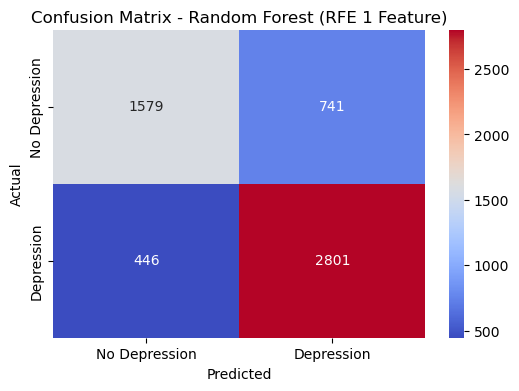

In [31]:
accuracy = accuracy_score(y_test, y_pred_rf_rfe)
conf_matrix = confusion_matrix(y_test, y_pred_rf_rfe)
class_report = classification_report(y_test, y_pred_rf_rfe)

print(f"Random Forest with RFE (1 feature) - Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (RFE 1 Feature)")
plt.show()

As always, to ensure reliable and quantifiable results, we used Confusing matrix, and its result is the same as logistic regression, showing that the accurability of this feature is approximately 79%, confirming that it is a fundamental factor in predicting depression.

# XGBoost

### METRIC REPORT AND CONFUSION MATRIX OF ALL FEAUTURES  XGBoost

XGBoost (All Features) - Accuracy: 0.837614514100952

Confusion Matrix:
 [[1802  518]
 [ 386 2861]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2320
           1       0.85      0.88      0.86      3247

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.83      5567
weighted avg       0.84      0.84      0.84      5567



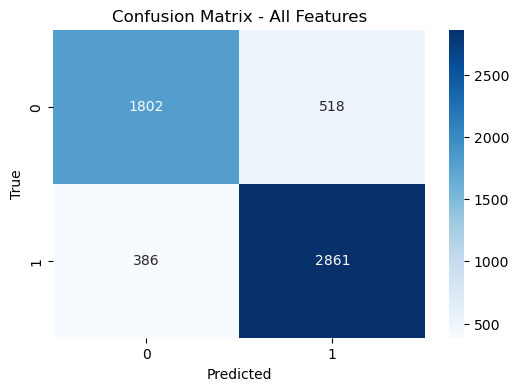

In [ ]:
xgb_all = XGBClassifier(eval_metric='logloss', random_state=123) 
xgb_all.fit(X_train, Y_train)
y_pred_all = xgb_all.predict(X_test)

print("XGBoost (All Features) - Accuracy:", accuracy_score(y_test, y_pred_all))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_all))
print("\nClassification Report:\n", classification_report(y_test, y_pred_all))

def plot_confusion_matrix(y_true, y_pred, title):
    labels = sorted(Y.unique())
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(y_test, y_pred_all, "Confusion Matrix - All Features")

Following the same steps, this time we used another model: XGBoost. This is one of the most powerful machine learning algorithms, offering increased accuracy and efficiency. Using an optimized gradient reinforcement technique, it reduces errors by using a reinforcement framework. It handles missing values well, prevents over-fitting through regularization and works efficiently on large datasets. Given its performance, we used it as the final model to maximize accuracy and refine our understanding of depression prediction.

So we trained our machine with this data, starting by giving it all the features, then we calculated the Confusing matrix to find out the accuracy. Its result was 0.837, i.e. around 83% to 84%, one result being the same as the others, but Logistic Regression scored around 0.01 better. 

### RFE 6 FEATURES SELECTION AND MODEL TRAINING

In [ ]:
rfe_6 = RFE(estimator=XGBClassifier(eval_metric='logloss', random_state=123), n_features_to_select=6)
X_rfe_6 = rfe_6.fit_transform(X, Y)
selected_features_6 = X.columns[rfe_6.support_]

print(f"Selected Features (XGBoost + RFE): {selected_features_6}")


X_train_rfe6, X_test_rfe6, y_train, y_test = train_test_split(X_rfe_6, Y, test_size=0.2, random_state=123)

xgb_rfe6 = XGBClassifier(eval_metric='logloss', random_state=123)
xgb_rfe6.fit(X_train_rfe6, y_train)
y_pred_rfe6 = xgb_rfe6.predict(X_test_rfe6)


print("XGBoost with RFE (6 features) trained successfully!")

Selected Features (XGBoost + RFE): Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Financial Stress'],
      dtype='object')
XGBoost with RFE (6 features) trained successfully!



In the same way, this time we select 6 features, thanks to RFE, and then train our mahine with them.
The results show that XGBoost had chosen features which are very logical, and which would indeed have a great impact on the cause of depression (Age, Academic pressure, Study satisfaction, Dietary Habits, Suicidal thoughts, and Financial stress).

### PCA PLOT USING THE 6 SELECTED FEATURES 

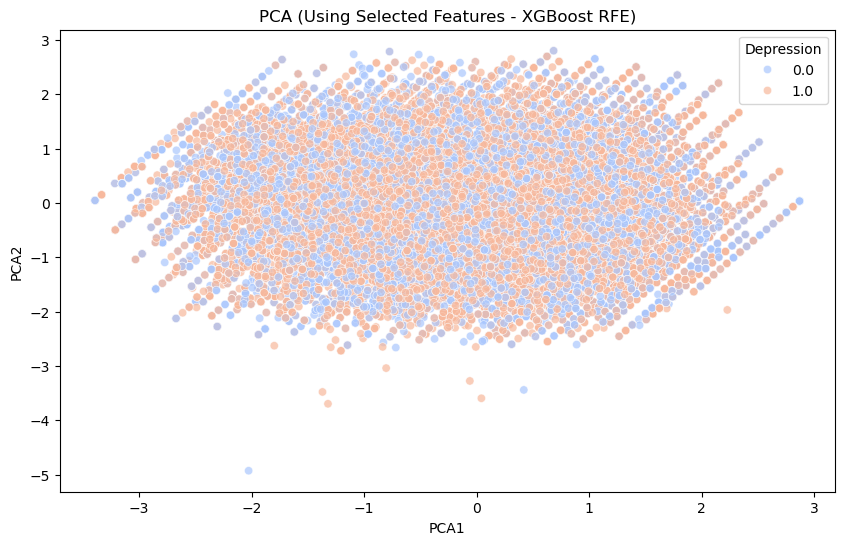

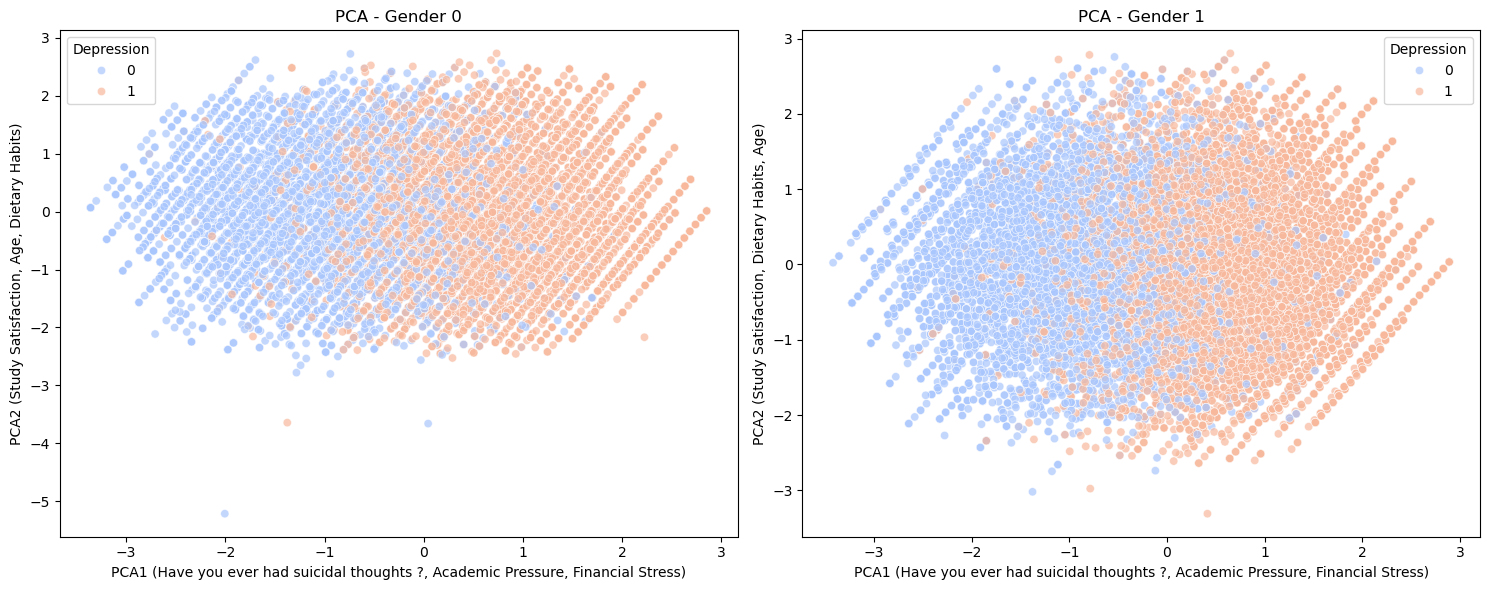

In [ ]:
# Create isolated feature set and visualization copy
X_selected_6 = df[selected_features_6]
X_selected_6_PCA = X_selected_6.copy()  # Independent copy
X_selected_6_PCA["Gender"] = df["Gender"]  # Add gender for grouping
X_selected_6_PCA["Depression"] = df["Depression"]  # Add target for coloring

# PCA analysis (using ONLY selected features)
scaler = StandardScaler()
X_scaled_6 = scaler.fit_transform(X_selected_6)  # Original features only

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled_6)

# Create PCA dataframe
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df["Depression"] = Y  # Add depression labels

# Main PCA plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Depression", 
               palette="coolwarm", alpha=0.7)
plt.title("PCA (Using Selected Features - XGBoost RFE)")
plt.show()

# Set numeric columns for the plot function (CRUCIAL STEP)
numeric_columns = selected_features_6  # This is used internally by plot_pca_by_gender

# Gender comparison plots (using modified dataframe)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_pca_by_gender(X_selected_6_PCA, gender=0, ax=axes[0])  # Pass modified data
plot_pca_by_gender(X_selected_6_PCA, gender=1, ax=axes[1])
plt.tight_layout()
plt.show()

Once again, using PCA, we were able to visualize the distribution of points, and the differentiation between students with and without depression appears much better when we separate the two genders. 
We still don't have any distinctive lines between depressives and non-depressives, since we're now sure that the detection of depression is indeed something more complicated. The fact that we still have an overlap between these two aspects during different models amply justifies this. 
However, it does help us to better identify the main causes of this disease.

### METRIC REPORT AND CONFUSION MATRIX OF RFE's 6 SELECTED FEATURES LOGISTIC REGRESSION 

XGBoost with RFE (6 Features) - Accuracy: 0.8415663732710617

Confusion Matrix:
 [[1822  492]
 [ 390 2863]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2314
           1       0.85      0.88      0.87      3253

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.84      5567
weighted avg       0.84      0.84      0.84      5567



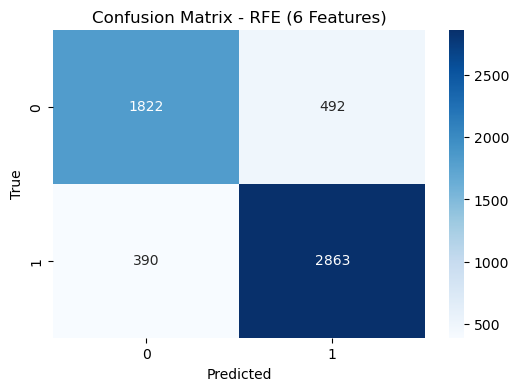

In [ ]:
print("XGBoost with RFE (6 Features) - Accuracy:", accuracy_score(y_test, y_pred_rfe6))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rfe6))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rfe6))
plot_confusion_matrix(y_test, y_pred_rfe6, "Confusion Matrix - RFE (6 Features)")

To verify the reliability of our results, we used the Confusion Matrix again. The results showed that XGBoost with RFE outperformed the other models in terms of accuracy.

Logistic Regression with RFE (6 features): 0.839 (≈ 84%)
Random Forest with RFE (6 features): 0.8191 (≈ 82%)
XGBoost with RFE (6 features): 0.8416 (≈ 84%)
While Logistic Regression remained stable after feature selection, Random Forest experienced a slight drop in accuracy. However, XGBoost with RFE achieved the best accuracy, improving from 0.8376 (≈ 83–84%) to 0.8416 (≈ 84%).

This confirms that XGBoost with RFE was the most effective model, maintaining high accuracy while minimizing classification errors.

### RFE 1 FEATURE SELECTION AND MODEL TRAINING

In [ ]:
rfe_1 = RFE(estimator=XGBClassifier(eval_metric='logloss', random_state=123), n_features_to_select=1)
X_rfe_1 = rfe_1.fit_transform(X, Y)
selected_feature_1 = X.columns[rfe_1.support_]

print(f"Selected Feature (XGBoost + RFE): {selected_feature_1}")


X_train_rfe1, X_test_rfe1, y_train, y_test = train_test_split(X_rfe_1, Y, test_size=0.2, random_state=123)


xgb_rfe1 = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_rfe1.fit(X_train_rfe1, y_train)
y_pred_rfe1 = xgb_rfe1.predict(X_test_rfe1)

print("XGBoost with RFE (1 feature) trained successfully!")

Selected Feature (XGBoost + RFE): Index(['Have you ever had suicidal thoughts ?'], dtype='object')
XGBoost with RFE (1 feature) trained successfully!


Once again, we'd like to see even this model as the most powerful feature, the most predictive of depression. The result remains the same in all models: Suicide thoughts.

### METRIC REPORT AND CONFUSION MATRIX OF RFE's 1 SELECTED FEATURE LOGISTIC REGRESSION 

XGBoost with RFE (1 Feature) - Accuracy: 0.7846236752290282

Confusion Matrix:
 [[1571  743]
 [ 456 2797]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.72      2314
           1       0.79      0.86      0.82      3253

    accuracy                           0.78      5567
   macro avg       0.78      0.77      0.77      5567
weighted avg       0.78      0.78      0.78      5567



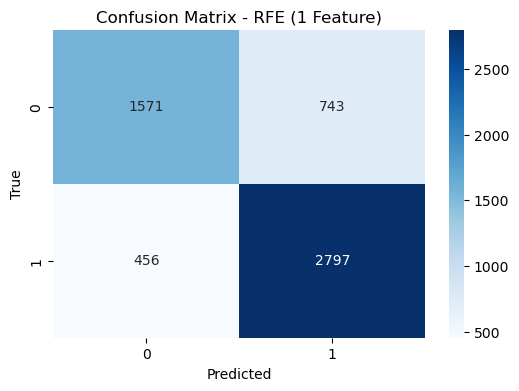

In [ ]:
print("XGBoost with RFE (1 Feature) - Accuracy:", accuracy_score(y_test, y_pred_rfe1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rfe1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rfe1))
plot_confusion_matrix(y_test, y_pred_rfe1, "Confusion Matrix - RFE (1 Feature)")

Just like the other times, even the accuracy remains the same, which is approximately 79% on its own. 

## Answering Questions
### Can you describe what features determine depression in university students?
PCA plots revealed no clear separation between depressed and non-depressed students, highlighting the complexity of depression, which cannot be accurately predicted using just one or two variables. However, certain features show strong correlations with depression. Notably, suicidal thoughts were consistently selected as the most influential predictor when RFE = 1, contributing approximately 78% to model performance.

The most significant features, as identified by XGBoost, include:

Age,
Academic Pressure,
Study Satisfaction,
Dietary Habits,
Suicidal Thoughts,
Financial Stress.
### Can you build a classification model to accurately predict depressed student?
The XGBoost model with RFE (6 features) was selected as the most efficient classification model. It achieves nearly the same accuracy as the Logistic Regression model trained on all features while requiring fewer inputs and maintaining the lowest False Positive Rate among all trained models.

Meanwhile the Logistic Regression model trained on all features remains the most accurate overall. Users can opt for this model if they are willing to input all 13 features for prediction. 

However, the user may come from a city or hold a degree that is entirely different from those found in the data used to train the models.

This also explains why the XGBoost model with six selected features is considered the default model, as it requires features that are available for any individual.
### What would you tell people to watch out for if they were depressed?
Based on this dataset, students already experiencing depression should pay attention to the six key predictive features. However, many of these, such as age and past suicidal thoughts, are unchangeable. Among the selected features, dietary habits stand out as the only modifiable factor.

Improving dietary habits may be a practical step for both managing and preventing depression.
